## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 108.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
arviz 0.22.0 requires matplotlib>=3.8, but you have matplotlib 3.7.1 which is incompatible.
arviz 0.22.0 requires numpy>=1.26.0, but you have numpy 1.25.2 which is incompatible.
arviz 0.22.0 requires pandas>=2.1.0, but 

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
loan_data = pd.read_csv("Loan_Modelling.csv")
data = loan_data.copy()

## Data Overview

* Observations
* Sanity checks

In [4]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.shape

(5000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data = data.drop(["ID", "ZIPCode"], axis=1)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution? Answer: Most of the customers do not have mortgage. There are multiple outliers
2. How many customers have credit cards? Answer : 1470 customers have Credit cards
3. What are the attributes that have a strong correlation with the target attribute (personal loan)? Answer: Income, CCAvg and CD_Account have strong correlation with Personal Loan. Age and Experience is perfectly corelated with each other.
4. How does a customer's interest in purchasing a loan vary with their age?  Answer: Customers below 25 years and above 66 years does not have any Personal loan. Customers between 30 and 50 years have more personal loan.
5. How does a customer's interest in purchasing a loan vary with their education? Answer : Graduate and Professionals have taken more Personal loan compared to Undergraduates.

In [10]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

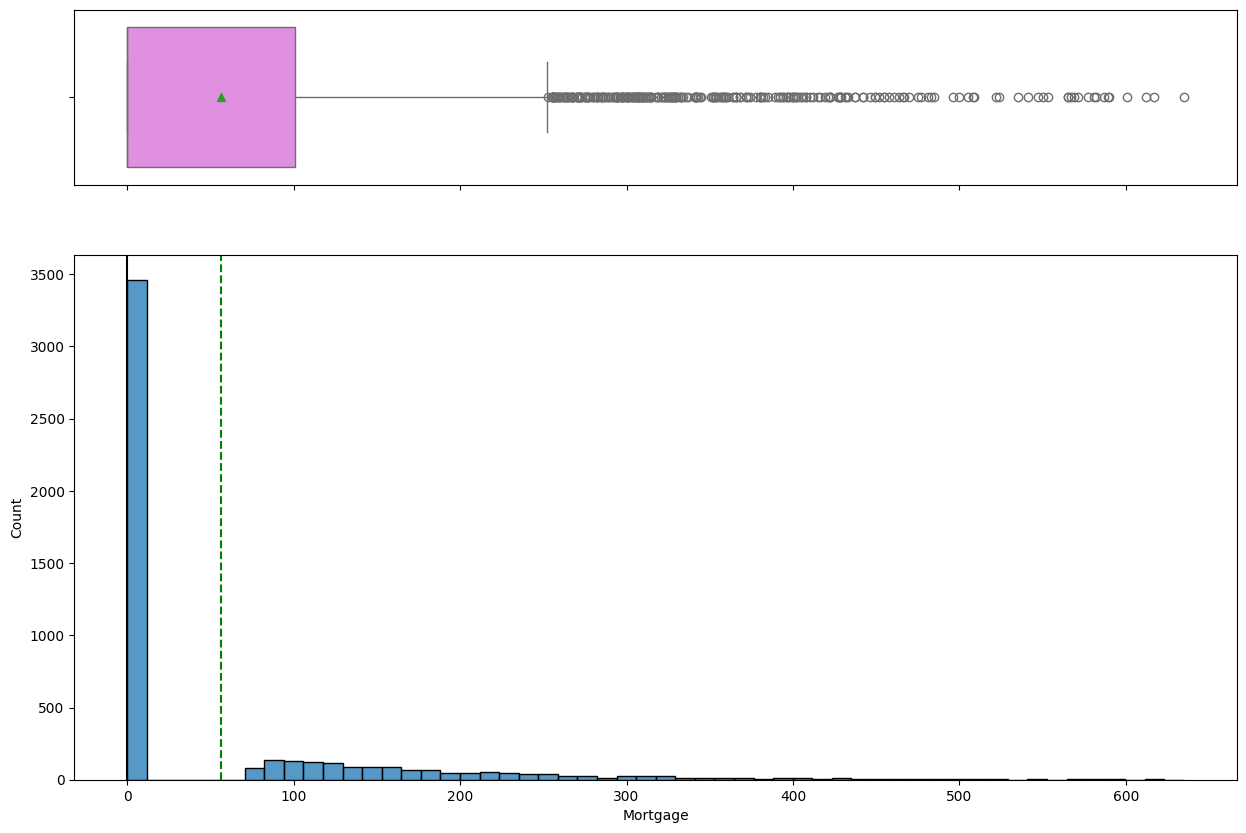

In [11]:
histogram_boxplot(data, 'Mortgage')


Most of the customers do not have mortgage. There are multiple outliers

In [12]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

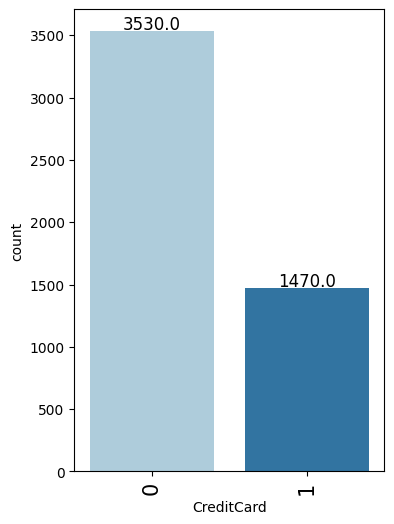

In [13]:
labeled_barplot(data, 'CreditCard')

1470 customers have Credit cards

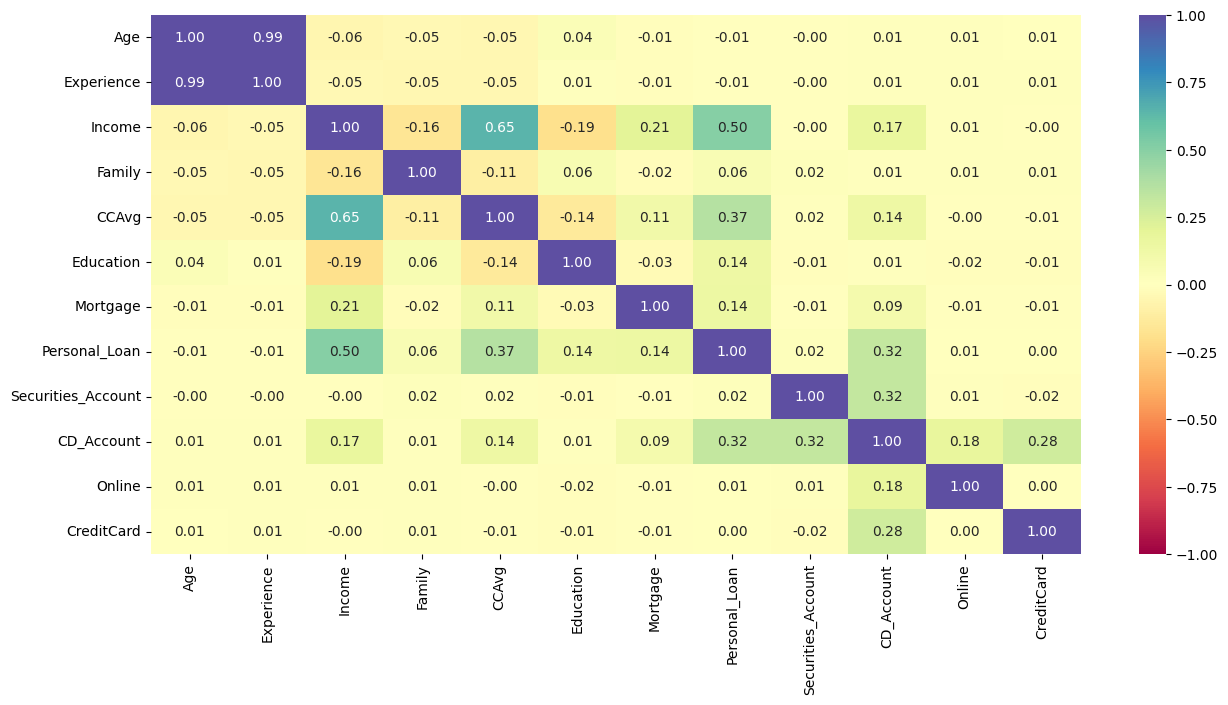

In [14]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Income, CCAvg and CD_Account have strong correlation with Personal Loan. Age and Experience is perfectly corelated with each other.

In [15]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Personal_Loan     0    1   All
Age                           
All            4520  480  5000
34              116   18   134
30              119   17   136
36               91   16   107
63               92   16   108
35              135   16   151
52              130   15   145
43              134   15   149
33              105   15   120
54              128   15   143
29              108   15   123
42              112   14   126
56              121   14   135
44              107   14   121
65               66   14    80
46              114   13   127
45              114   13   127
50              125   13   138
26               65   13    78
48              106   12   118
27               79   12    91
32              108   12   120
61              110   12   122
57              120   12   132
38              103   12   115
53              101   11   112
51              119   10   129
58              133   10   143
47              103   10   113
60              117   10   127
49      

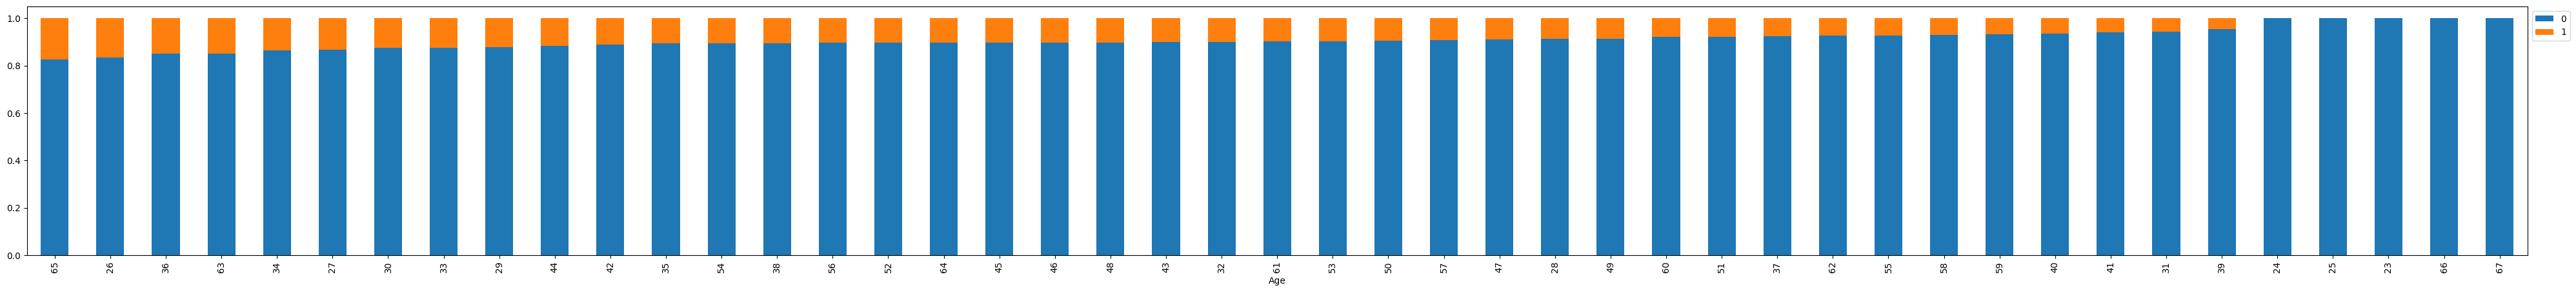

In [16]:
stacked_barplot(data,  'Age', 'Personal_Loan')


Customers below 25 years and above 66 years does not have any Personal loan.

Customers between 30 and 50 years have more personal loan.

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


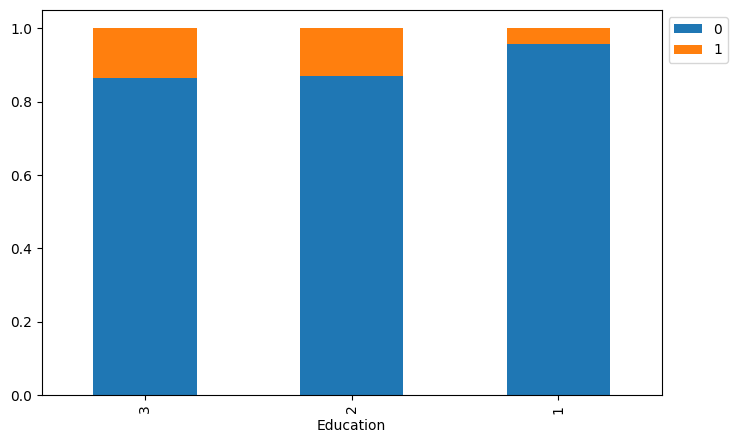

In [17]:
stacked_barplot(data,  'Education', 'Personal_Loan')

Graduate and Professionals have taken more Personal loan compared to Undergraduates.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [18]:
#Checking for null values
data.isnull().sum()

,0
Age,0
Experience,0
Income,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0
Securities_Account,0
CD_Account,0


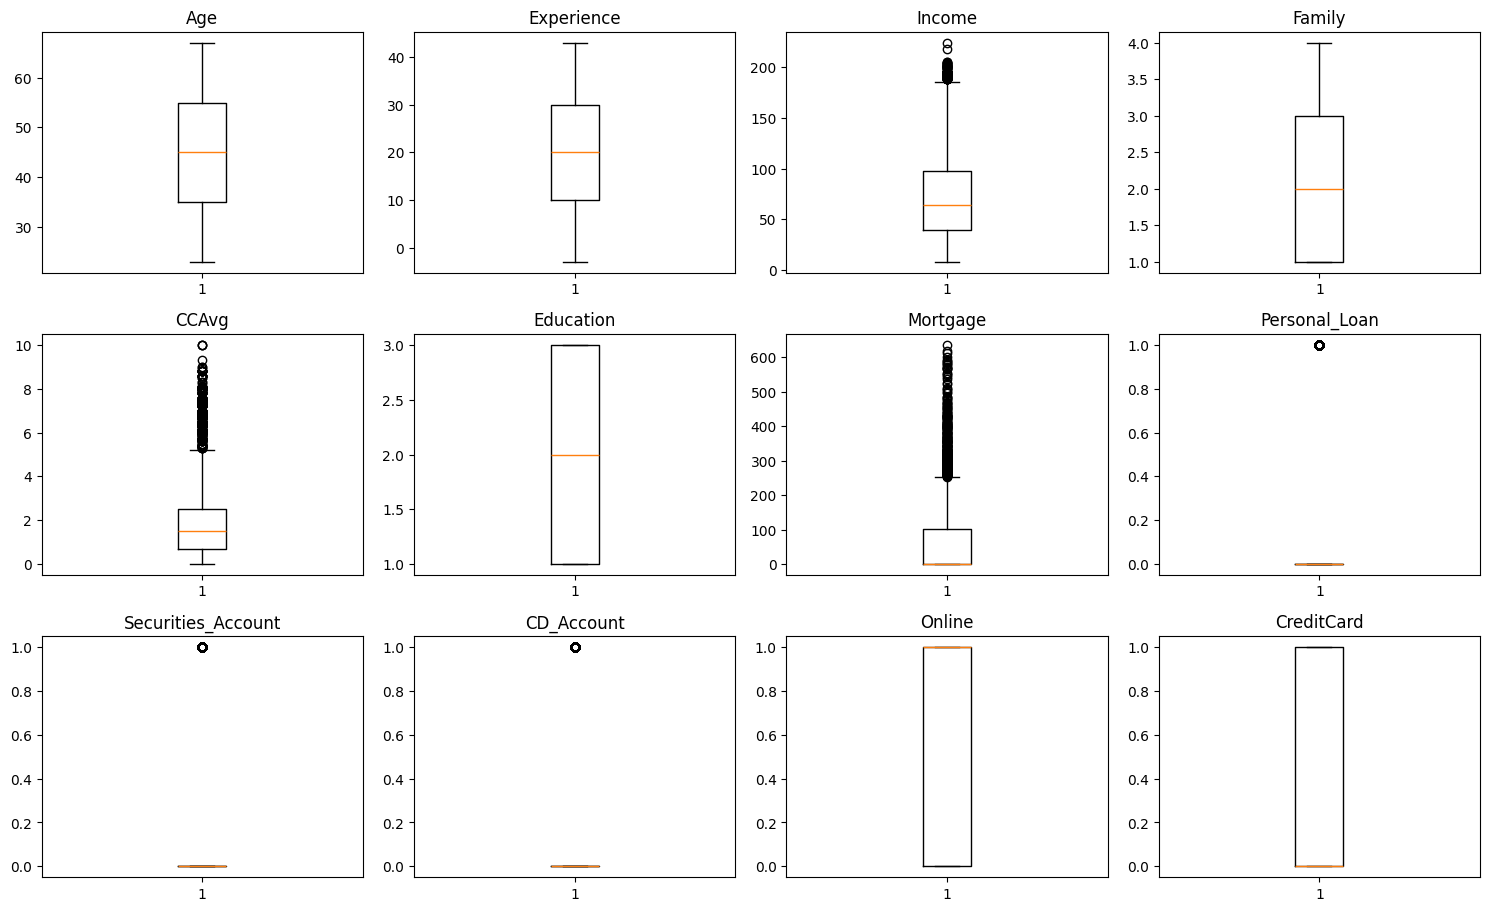

In [19]:
# Outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

There are outliers for CCAvg, Mortgage, Income.

In [20]:
#Data Preparation for  Modelling
X = data.drop(["Personal_Loan", "Experience"], axis=1) # As Age and Experience perfectly correlated
Y = data["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [21]:
X

,Age,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,1,0


In [22]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 10)
Shape of test set :  (1500, 10)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

Model can make wrong predictions as:


Predicting a customer will take personal loan fail but in reality, the customer does not take the loan (FP).
Predicting a customer will not take the loan, but the customer takes the loan(FN).

Which case is more important?

If we predict that a customer will take the loan, but does not take the loan , then the company does not lose anything.
If we predict that a customer will not take the loan and but actually customer takes the loan, company will loose money.
So, Falase Negative is more important here.

How to reduce the losses?

The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.





In [23]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [24]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

In [25]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

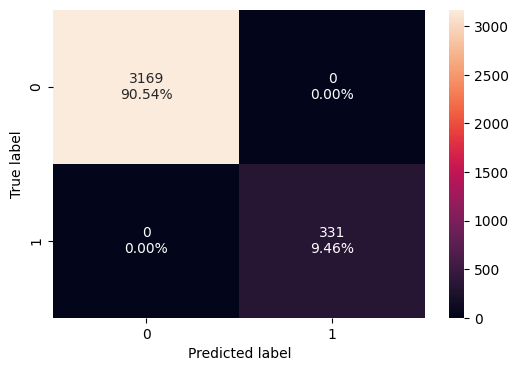

In [26]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [27]:
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


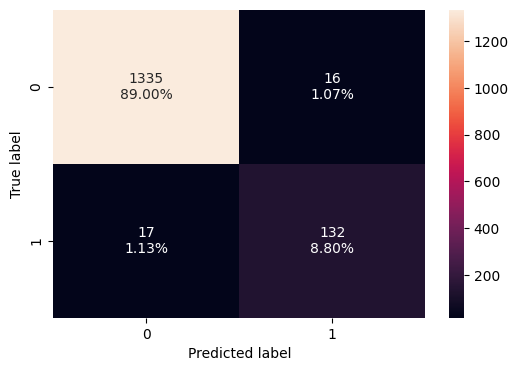

In [28]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [29]:
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_perf_test

,Accuracy,Recall,Precision,F1
0,0.978,0.885906,0.891892,0.888889


As 90% of the data is with Not personal loan and around 10% is with personal loan, we need to set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

In [30]:

#Build model with class weight
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

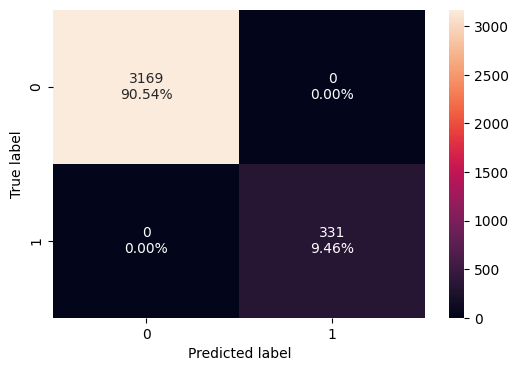

In [31]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [32]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0



Model is able to perfectly classify all the data points on the training set.
0 errors on the training set, each sample has been classified correctly.
As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

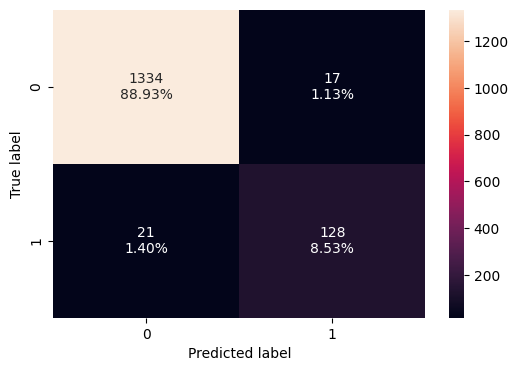

In [33]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [34]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.974667,0.85906,0.882759,0.870748



The model performs perfectly (1.0) on training data.
But the performance drops significantly on the test set — particularly in Recall(14% drop) and F1(13% drop), which are crucial for imbalanced datasets. This suggests that the model is overfiiting.

Let's use pruning techniques to try and reduce overfitting.

## Model Performance Improvement

## Decision Tree( Pre Pruning)

In [35]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 9, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                #class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 6
Max leaf nodes: 50
Min samples split: 50
Best test recall score: 0.87248322147651


In [36]:
# creating an instance of the best model
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(6), max_leaf_nodes=50,
                       min_samples_split=50, random_state=42)

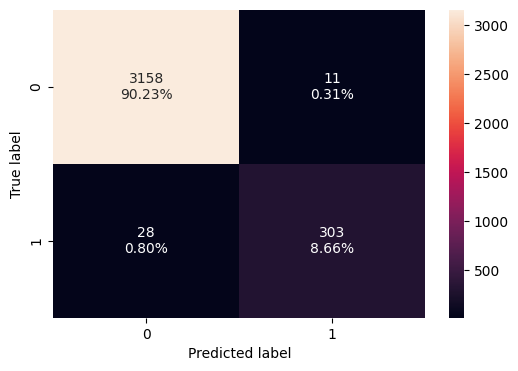

In [37]:
confusion_matrix_sklearn(model2, X_train, y_train)

In [38]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.988857,0.915408,0.964968,0.939535


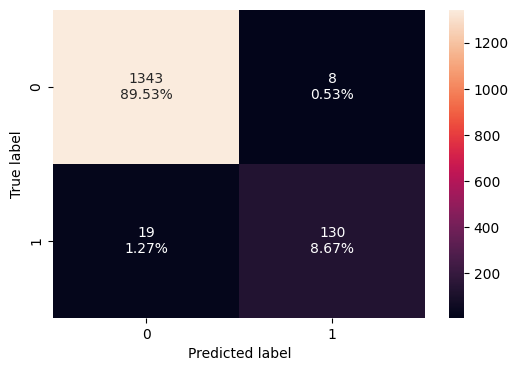

In [39]:
confusion_matrix_sklearn(model2, X_test, y_test)

In [40]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.982,0.872483,0.942029,0.905923


Now since the recall scores difference between training(.91) and test data(.87) is less, the model is able to generalize well on unseen data.

In [41]:
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)

print(feature_names)
print(importances)
print(indices)

['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
[0.0031778  0.33155818 0.15939476 0.04375142 0.44695104 0.
 0.         0.01516679 0.         0.        ]
[6 5 9 8 0 7 3 2 1 4]


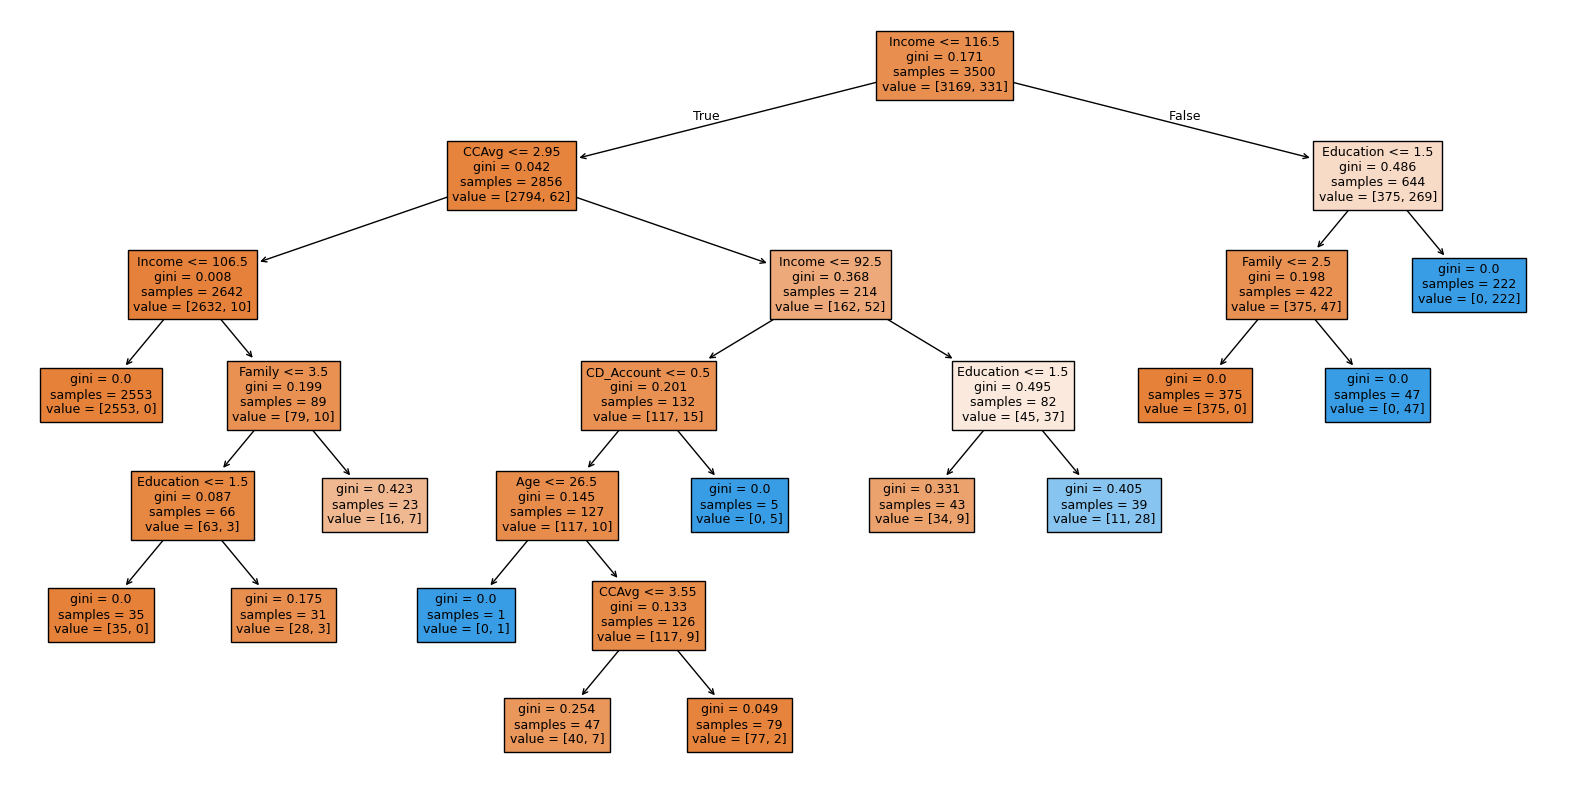

In [42]:


plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [43]:
# Text report showing the rules of a decision tree
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [35.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- weights: [28.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- weights: [16.00, 7.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- weights: [40.00, 7.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.55
|   |   |   |   |   |   |--- weights: [77.00, 2.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   | 

Using the above extracted decision rules we can make interpretations from the decision tree model like: If CCAvg > 2.95 and Income less than 92.50 and CD_Account less than 0.5 and Age is greater than 26.5, the customer will take the loan

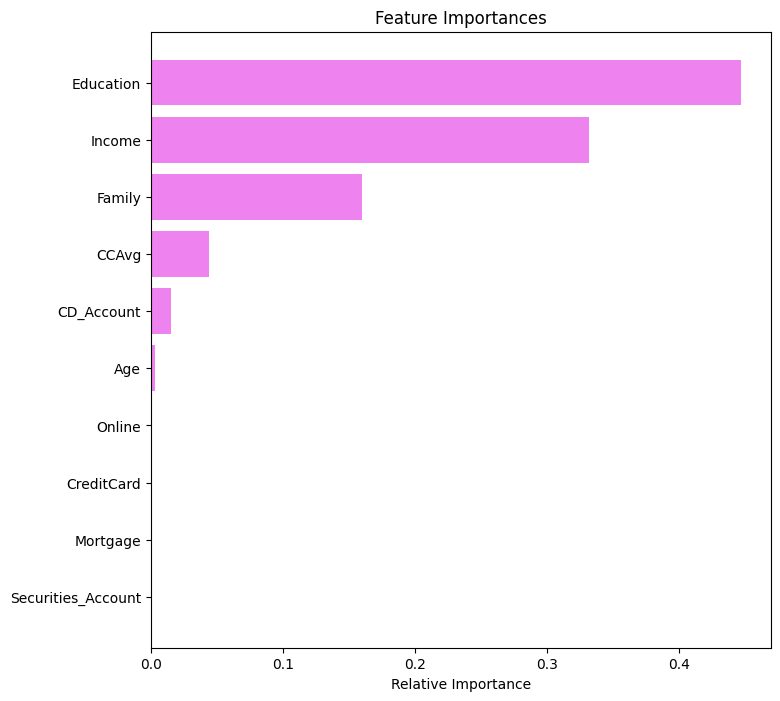

In [44]:
# importance of features in the tree building

importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In the pre-pruned decision tree, Education, Income are the most important features.

## Decision Tree (Post pruning)

In [45]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-7.502876e-15
1,3.853725e-19,-7.502491e-15
2,3.853725e-19,-7.502106e-15
3,4.729571e-19,-7.501633e-15
4,5.255079e-19,-7.501107e-15
5,1.051016e-18,-7.500056e-15
6,1.257806e-17,-7.487478e-15
7,1.524700e-04,3.049400e-04
8,1.568682e-04,6.186765e-04
9,2.095454e-04,1.247313e-03


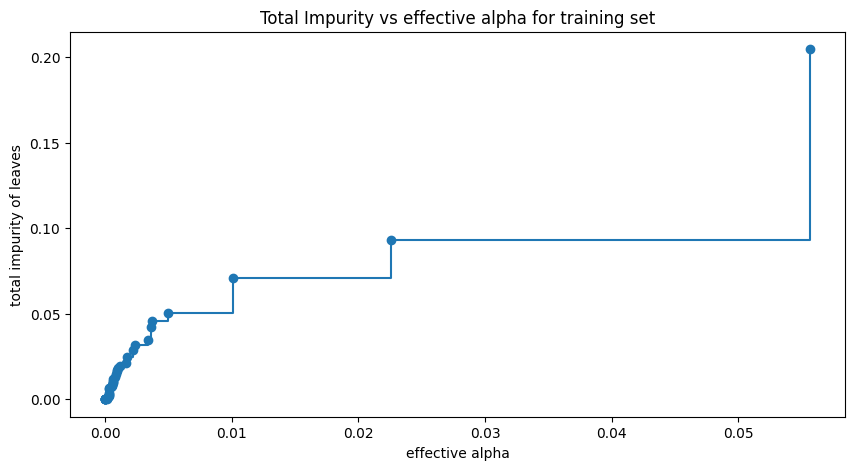

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [47]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29537927599923197


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

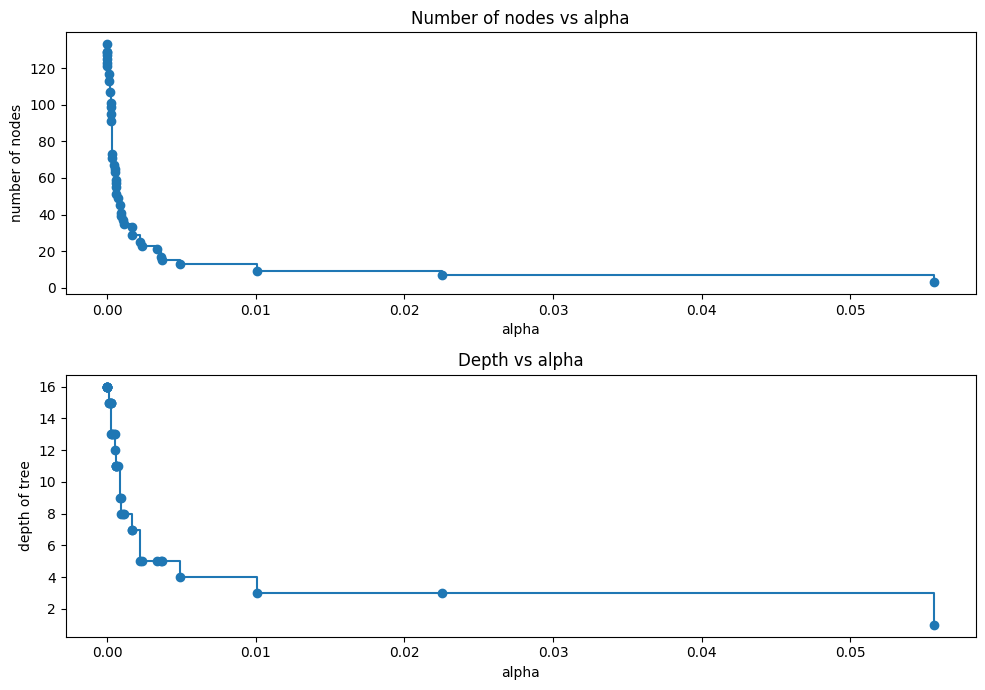

In [48]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [49]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [50]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [51]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

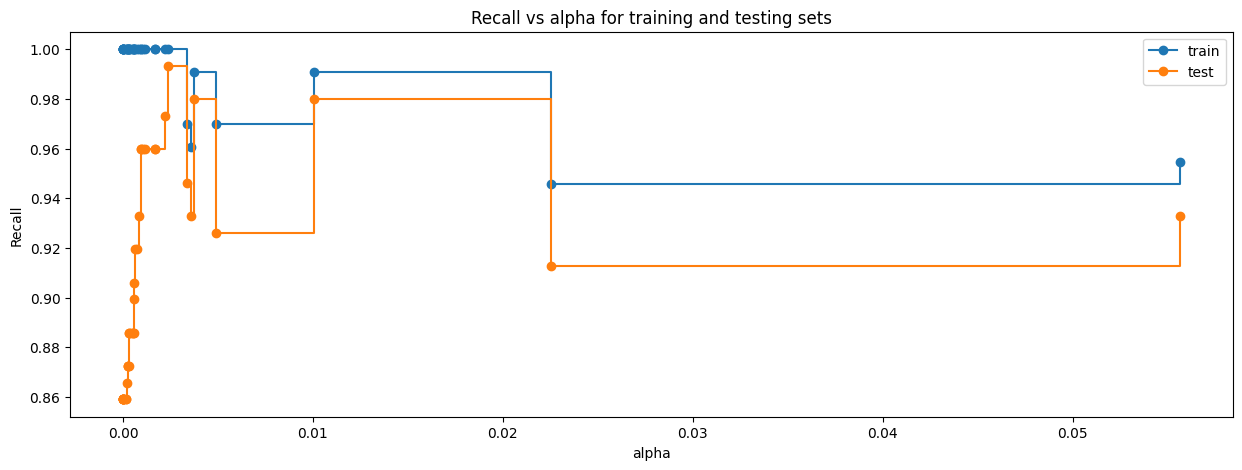

In [52]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [53]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.002375808619774652),
                       class_weight='balanced', random_state=1)


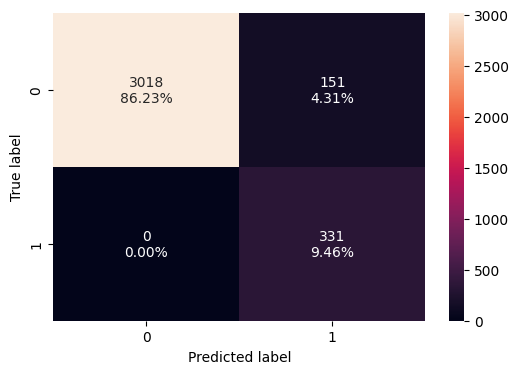

In [54]:
model4 = best_model
confusion_matrix_sklearn(model4, X_train, y_train)

In [55]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    model4, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.956857,1.0,0.686722,0.814268


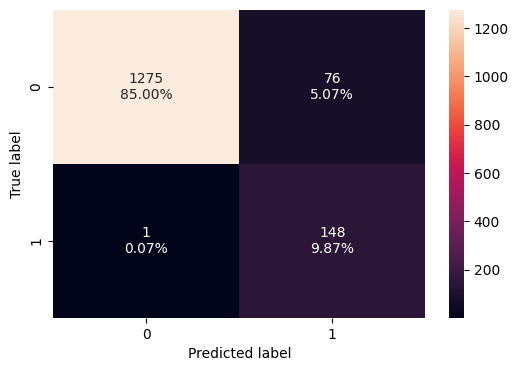

In [56]:
confusion_matrix_sklearn(model4, X_test, y_test)

In [57]:
decision_tree_post_test = model_performance_classification_sklearn(
    model4, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.948667,0.993289,0.660714,0.793566


In the post-pruned tree, since the difference between recall scores on both the train(1.0) and test data(.99) are negligible, which shows that the model is able to generalize well on unseen data.

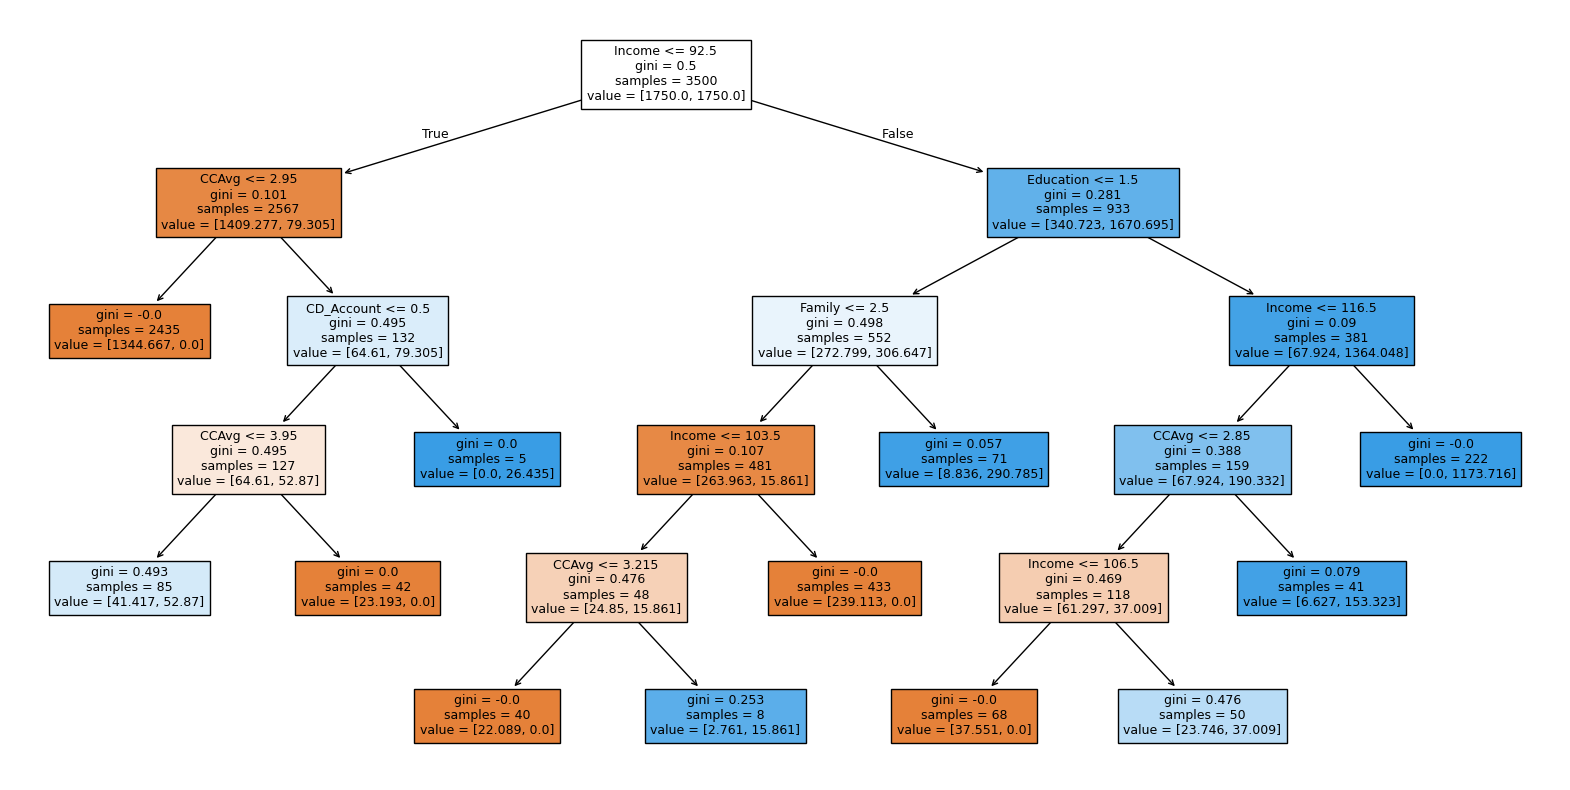

In [58]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [59]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model4, feature_names=feature_names, show_weights=True))


|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |--- Income >  103.50
|   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [8.84, 290.79] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.85
|   |   |   |   |--- Income <= 106.50
|   |   |   |   | 

Using the above extracted decision rules we can make interpretations from the decision tree model like: If Income is less than 92.5 and CCAvg > 2.95 and CD_Account less than 0.5 the customer will take the loan which is almost same as pre pruned tree

In [55]:
importances = model4.feature_importances_
indices = np.argsort(importances)

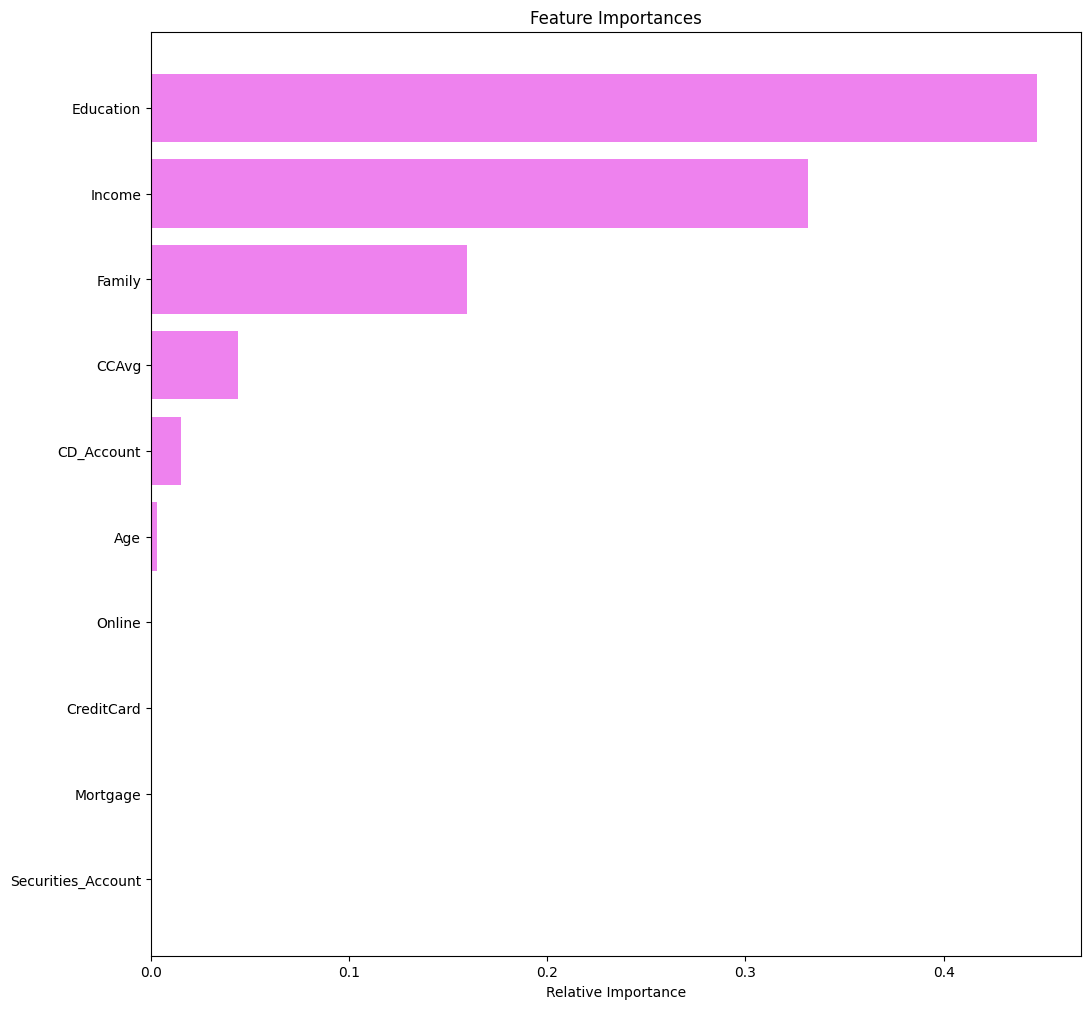

In [60]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In the post pruned tree, Education and Income anf Family are the most important features

## Model Performance Comparison and Final Model Selection

In [61]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.988857,0.956857
Recall,1.0,1.0,0.915408,1.000000
Precision,1.0,1.0,0.964968,0.686722
F1,1.0,1.0,0.939535,0.814268


In [62]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.978000,0.974667,0.982000,0.948667
Recall,0.885906,0.859060,0.872483,0.993289
Precision,0.891892,0.882759,0.942029,0.660714
F1,0.888889,0.870748,0.905923,0.793566


**Pre-Pruned Tree:**
More balanced performance across all metrics.
* High test F1 score (0.9059) indicates strong generalization.
* Higher precision (0.9420) means fewer false positives.
* Slight drop in recall (0.8725), but still strong.


**Post-Pruned Tree:**
* Prioritizes high recall (0.9933) means good if false negatives are
very costly.
* But precision is low (0.6607) means lots of false positives.
* Overall F1 is lower (0.7936) indicates poorer balance between precision and recall.

**Conclusion**
 Pre-Pruned Decision Tree is the better model overall because of best balance of precision, recall, and F1 on test data.


## Actionable Insights and Business Recommendations




* The model built can be used to predict if a customer will take the loan or not and can correctly identify 97% of the time.

* Education, Income and Family are the most important variables in predicting whether a customer will take the loan or not.

* From the decision tree, it has been observed that if Income is less than 92.5 and CCAvg > 2.95 and CD_Account less than 0.5, the customer will most likely take the loan. The company should give a vigilant eye for these values in order to predict a potential customer for loan purchase.


___